In [61]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

In [62]:
dfo1hrun1 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun2 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun3 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun4 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

In [66]:
dfO1h = pd.concat([dfo1hrun1['Delays'], dfo1hrun1['Time-delay1'], dfo1hrun2['Time-delay2'], dfo1hrun3['Time-delay3'], 
                  dfo1hrun4['Time-delay4']], axis=1)
dfO1h = dfO1h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO1h['mean'] = dfO1h.iloc[:, 1:].mean(axis=1)
dfO1h['std'] = dfO1h.iloc[:, 1:].std(axis=1)

In [2]:
dfo1run1 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1run2 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1run3 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1run4 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)
dfo1run5 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run5.txt', delimiter=' ' , dtype= np.float64)
dfo1run6 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run6.txt', delimiter=' ' , dtype= np.float64)
dfo1run7 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run7.txt', delimiter=' ' , dtype= np.float64)

In [14]:
dfO1 = pd.concat([dfo1run1['Delays'], dfo1run1['Time-delay1'], dfo1run2['Time-delay2'], dfo1run3['Time-delay3'], 
                  dfo1run4['Time-delay4']], axis=1)
dfO1 = dfO1.rename(columns={"Delays": "Delays_Full", "Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO1 = pd.concat([dfO1, dfo1run5['Time-delay1'], dfo1run6['Time-delay2'], dfo1run7['Time-delay3']], axis=1)
dfO1 = dfO1.rename(columns={"Time-delay1": "Run5", "Time-delay2": "Run6", "Time-delay3": "Run7"}, 
                   errors="raise")

,Delays_Full,Run1,Run2,Run3,Run4,Run5,Run6,Run7
0,0.0,9.213070,9.663141,0.908830,0.310127,1.155165,0.775014,0.438908
1,1.0,6.669789,3.186019,1.426144,1.180153,1.697489,0.999953,0.987778
2,2.0,5.421384,2.203175,0.271664,0.619675,0.732824,0.535107,0.557271
3,3.0,2.646432,1.153267,0.223678,1.280681,1.189461,1.152852,1.263924
4,4.0,-0.671042,-0.739660,1.444421,2.373386,1.410926,2.013493,1.808176
...,...,...,...,...,...,...,...,...
94,94.0,2.182877,1.454256,3.524852,2.949915,NaN,3.253215,2.565307
95,95.0,2.095057,2.112635,1.881562,0.629240,NaN,1.663963,1.670301
96,96.0,1.853451,1.558897,1.252582,1.693931,NaN,1.640973,1.554924
97,97.0,2.887546,2.440725,2.596444,2.078013,NaN,3.053906,3.130718


In [29]:
dfO1['mean'] = dfO1.iloc[:, 3:].mean(axis=1)
dfO1['std'] = dfO1.iloc[:, 3:].std(axis=1)

,Delays_Full,Run1,Run2,Run3,Run4,Run5,Run6,Run7,mean,std
0,0.0,9.213070,9.663141,0.908830,0.310127,1.155165,0.775014,0.438908,0.729144,0.308267
1,1.0,6.669789,3.186019,1.426144,1.180153,1.697489,0.999953,0.987778,1.263157,0.270965
2,2.0,5.421384,2.203175,0.271664,0.619675,0.732824,0.535107,0.557271,0.547632,0.152195
3,3.0,2.646432,1.153267,0.223678,1.280681,1.189461,1.152852,1.263924,1.023280,0.401977
4,4.0,-0.671042,-0.739660,1.444421,2.373386,1.410926,2.013493,1.808176,1.806753,0.361036
...,...,...,...,...,...,...,...,...,...,...
94,94.0,2.182877,1.454256,3.524852,2.949915,NaN,3.253215,2.565307,3.069976,0.356917
95,95.0,2.095057,2.112635,1.881562,0.629240,NaN,1.663963,1.670301,1.462980,0.488288
96,96.0,1.853451,1.558897,1.252582,1.693931,NaN,1.640973,1.554924,1.536057,0.170767
97,97.0,2.887546,2.440725,2.596444,2.078013,NaN,3.053906,3.130718,2.714635,0.420561


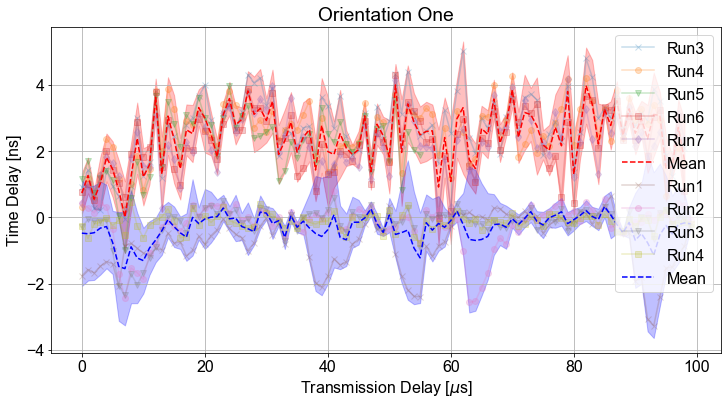

In [69]:
plt.figure(figsize=(12,6))
[plt.plot(dfO1['Delays_Full'], dfO1[r], p, label = str(r), alpha = 0.25) for r, p in zip(dfO1.keys()[3:8], ['-x', '-o', '-v', '-s', '-d', '-*'])]
plt.plot(dfO1['Delays_Full'], dfO1['mean'], '--', color = 'r', label = 'Mean')
plt.fill_between(dfO1.index, dfO1['mean'] - 2*dfO1['std'], dfO1['mean'] + 2*dfO1['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO1h['Delays'], dfO1h[r], p, label = str(r), alpha = 0.25) for r, p in zip(dfO1h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'])]
plt.plot(dfO1h['Delays'], dfO1h['mean'], '--', color = 'b', label = 'Mean')
plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
                alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
plt.legend()
plt.title('Orientation One')
plt.show()